In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('uci-secom.csv')

In [2]:
raw_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## null값 median으로 변경

In [3]:
raw_data.replace(np.nan, raw_data.median(), inplace=True)

In [4]:
# again, checking if there is any NULL values left
raw_data.isnull().any().any()

False

## 같은 값만 있는 열 제거

In [5]:
unique_columns = []
for i in raw_data.columns:
    tmp = raw_data[i].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [6]:
len(unique_columns)

116

In [7]:
raw_data.drop(unique_columns, axis='columns', inplace=True)

In [8]:
data = raw_data

## Time 변수 제거

In [9]:
data.drop('Time', axis='columns', inplace=True)

In [10]:
data

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,72.2889,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4616,-0.0013,0.0004,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## X, y 분리

In [11]:
X = data.loc[:,'0':'589'].copy() # 컬럼명으로 search 
y = data.loc[:,'Pass/Fail'].copy()

## Train, test split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

## 데이터 표준화

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 성능평가

accuracy score 0.9299363057324841
confusion_matrix [[290   3]
 [ 19   2]]
precision_score 0.09860479223536549
recall_score 0.09523809523809523
f1_score 0.15384615384615385


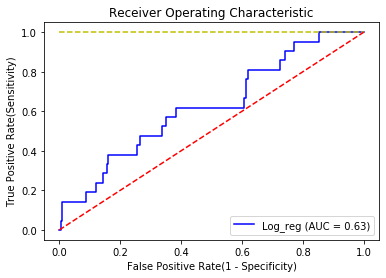

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## columns to list 

In [15]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=300

# Filter method 
- 통계적 방법, feature 간 상관관계를 알아내는 데 적합 
- wrapper를 사용하기 전 전처리하는데 이용

## Pearson correlation 
- filter-based method 
- target과 feature와의 상관계 분석 
- target과 상관관계가 높은 순으로 300개 추출 

In [19]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

300 selected features


In [45]:
cor_feature[:5]

['500', '267', '474', '438', '50']

## Chi-Square Features
- filter-based method 
- target 과 numerical variable 사이의 chi-square metirc 
- chi-squared values가 최대값을 갖는 variable select
- 분류 문제에서 사용하는 척도 
- 명목형 특징의 경우에만 사용

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X) # 표준화 진행 
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

300 selected features


In [46]:
chi_feature[:5]

['0', '3', '4', '8', '9']

# Wrapper method
- 전방 선택, 후방 선택 방법이 있음
- 후방 선택: recursive feature elimination (RFE)

## Recursive Feature Elimination
- wrapper based method 
- 시작: 모든 열 --> 점점 열의 갯수를 줄여나감 
- 이 때 열을 선택하는 기준: coef_ attribute(LogisticRegression) 혹은 feature importances attribute(Random Forest)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y) # 표준화 진행 

Fitting estimator with 474 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 464 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 454 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 444 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 434 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 424 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Fitting estimator with 414 features.
Fitting estimator with 404 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Fitting estimator with 394 features.
Fitting estimator with 384 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Fitting estimator with 374 features.
Fitting estimator with 364 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Fitting estimator with 354 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 344 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 334 features.
Fitting estimator with 324 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Fitting estimator with 314 features.
Fitting estimator with 304 features.


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

RFE(estimator=LogisticRegression(), n_features_to_select=300, step=10,
    verbose=5)

In [27]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

300 selected features


In [47]:
rfe_feature[:5]

['0', '1', '2', '3', '4']

# Embedded method
- 모델의 정확도에 기여하는 피처 학습 
- 내장된 알고리즘을 사용한다. 
- Lasso, Ridge, Elastic Net, SelelecFromModel(decision tree 기반 알고리즘에서 피처를 뽑아오는 방법 - random forest, light bgm)

## Lasso: SelectFromModel
- L1-norm 을 통해 제약을 주는 방법 
- 대부분의 feature에 weight 값을 0을 준다. (강한 제약)

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="none"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y) # 표준화 진행 

C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SelectFromModel(estimator=LogisticRegression(penalty='none'), max_features=300)

In [32]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

194 selected features


In [48]:
embeded_lr_feature[:5]

['2', '7', '10', '14', '17']

## Tree-based: SelectFromModel
- feature importance 로 feature select 
- feature importance 는 node impurities (지니불순도) 사용 

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), max_features=300)

In [37]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

191 selected features


In [43]:
embeded_rf_feature[:5]

['0', '2', '11', '16', '17']

## LGBMClassifier : SelectFromModel

We could also have used a LightGBM. Or an XGBoost object as long it has a featureimportances attribute.

In [16]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                max_features=300)

In [17]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

62 selected features


In [18]:
embeded_lgb_feature[:5]

['0', '10', '21', '22', '27']

# BONUS

In [42]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,59,True,True,True,True,True,True,6
2,582,True,True,True,True,True,True,6
3,577,True,True,True,True,True,True,6
4,558,True,True,True,True,True,True,6
5,488,True,True,True,True,True,True,6
6,460,True,True,True,True,True,True,6
7,439,True,True,True,True,True,True,6
8,333,True,True,True,True,True,True,6
9,316,True,True,True,True,True,True,6
10,301,True,True,True,True,True,True,6


# 선택된 feature의 성능 평가

In [51]:
pd.DataFrame()

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=474)

## Pearson correlation 성능평가
- Pearson correlation로 선택된 feature로 성능 평가 

In [76]:
df_cor = pd.DataFrame(X, columns=cor_feature)

In [77]:
X_cor = df_cor.copy() 

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cor, y, test_size=0.2, random_state = 10)

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9299363057324841
confusion_matrix [[291   2]
 [ 20   1]]
precision_score 0.07956728338893944
recall_score 0.047619047619047616
f1_score 0.08333333333333333


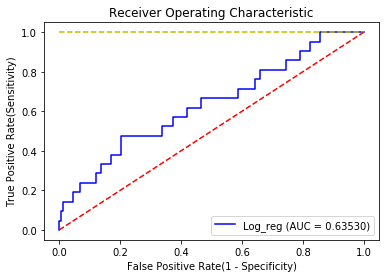

In [81]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## Chi-Square Features 성능평가 
- Chi-Square Features로 선택된 feature로 성능 평가 

In [82]:
df_chi = pd.DataFrame(X, columns=chi_feature)

In [83]:
X_chi = df_chi.copy() 

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_chi, y, test_size=0.2, random_state = 10)

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9267515923566879
confusion_matrix [[290   3]
 [ 20   1]]
precision_score 0.07559902942068547
recall_score 0.047619047619047616
f1_score 0.08


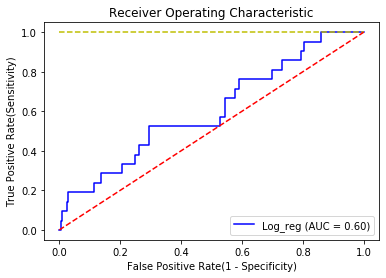

In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## Recursive Feature Elimination 성능평가 

In [100]:
df_rfe = pd.DataFrame(X, columns=rfe_feature)

In [101]:
X_rfe = df_rfe.copy() 

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state = 10)

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9331210191082803
confusion_matrix [[291   2]
 [ 19   2]]
precision_score 0.108128601759175
recall_score 0.09523809523809523
f1_score 0.16


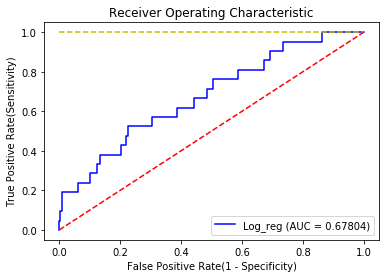

In [104]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## Lasso: SelectFromModel

In [105]:
df_lr = pd.DataFrame(X, columns=embeded_lr_feature)

In [106]:
X_lr = df_lr.copy() 

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.2, random_state = 10)

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9331210191082803
confusion_matrix [[291   2]
 [ 19   2]]
precision_score 0.108128601759175
recall_score 0.09523809523809523
f1_score 0.16


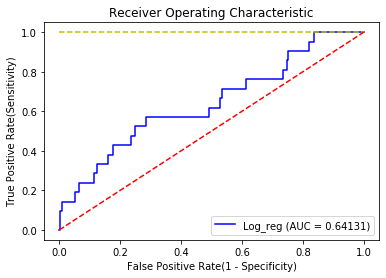

In [109]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## Tree-based: SelectFromModel

In [110]:
df_rf = pd.DataFrame(X, columns=embeded_rf_feature)

In [112]:
X_rf = df_rf.copy() 

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state = 10)

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9299363057324841
confusion_matrix [[290   3]
 [ 19   2]]
precision_score 0.09860479223536549
recall_score 0.09523809523809523
f1_score 0.15384615384615385


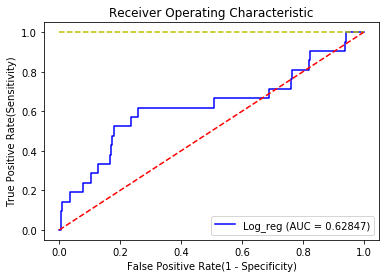

In [115]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## LGBMClassifier : SelectFromModel

### minmaxscaler

In [19]:
df_lgb = pd.DataFrame(X, columns=embeded_lgb_feature)

In [20]:
X_lgb = df_lgb.copy() 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_lgb,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  scaler = MinMaxScaler(feature_range=(0,1))

  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
    
  log_reg.fit(X_train_scaled, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test_scaled)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
  print('random_state=', rand,'  ' ,'auc_test =', auc_test)
  print('')
print('mean auc_test=',np.mean(auc_test))

random_state= 0    auc_test = 0.6202402248913877

random_state= 1    auc_test = 0.8229591836734693

random_state= 2    auc_test = 0.8037414965986396

random_state= 3    auc_test = 0.7646743978590543

random_state= 4    auc_test = 0.7799145299145299

random_state= 5    auc_test = 0.7528735632183908

random_state= 6    auc_test = 0.8481292517006803

random_state= 7    auc_test = 0.7431638129312548

random_state= 8    auc_test = 0.7199712643678161

random_state= 9    auc_test = 0.8253401360544217

random_state= 10    auc_test = 0.7168860718348773

random_state= 11    auc_test = 0.6893768768768769

random_state= 12    auc_test = 0.8057432432432432

random_state= 13    auc_test = 0.742805523293328

random_state= 14    auc_test = 0.8051695801583745

random_state= 15    auc_test = 0.7011325503355704

random_state= 16    auc_test = 0.6751115075825156

random_state= 17    auc_test = 0.7392798446137756

random_state= 18    auc_test = 0.8004358655043587

random_state= 19    auc_test = 0.769144144

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lgb, y, test_size=0.2, random_state = 10)

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9299363057324841
confusion_matrix [[292   1]
 [ 21   0]]
precision_score 0.06687898089171974
recall_score 0.0
f1_score 0.0


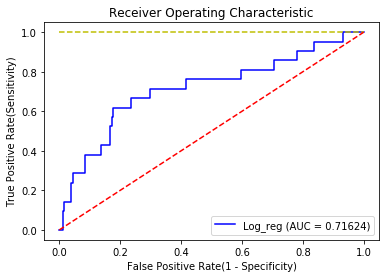

In [120]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lgb, y, test_size=0.2, random_state = 67)

In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9235668789808917
confusion_matrix [[290   1]
 [ 23   0]]
precision_score 0.0732484076433121
recall_score 0.0
f1_score 0.0


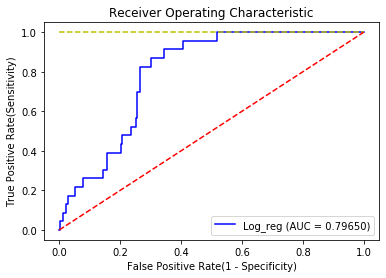

In [147]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lgb, y, test_size=0.2, random_state = 187)

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9522292993630573
confusion_matrix [[299   1]
 [ 14   0]]
precision_score 0.044585987261146494
recall_score 0.0
f1_score 0.0


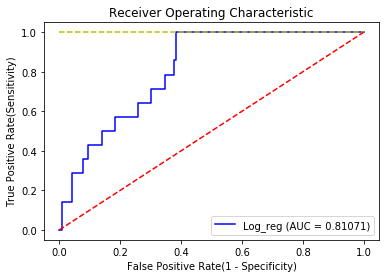

In [150]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lgb, y, test_size=0.2, random_state = 134)

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9426751592356688
confusion_matrix [[296   0]
 [ 18   0]]
precision_score 0.05732484076433121
recall_score 0.0
f1_score 0.0


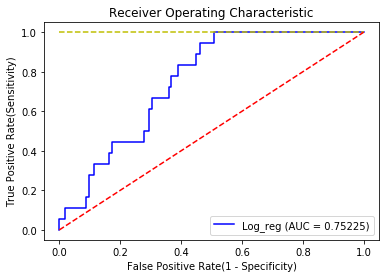

In [132]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [122]:
len(embeded_lgb_feature)

62

In [ ]:
embeded_lgb_feature

- random_state = 10, 67, 187, 134의 roc curve 평균
- (0.71624+0.79650+0.81071+0.75225)/4 = 0.774483
- 최고: 0.768925

### standardScaler

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lgb, y, test_size=0.2, random_state = 15)

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9299363057324841
confusion_matrix [[291   7]
 [ 15   1]]
precision_score 0.05558320063694268
recall_score 0.0625
f1_score 0.08333333333333333


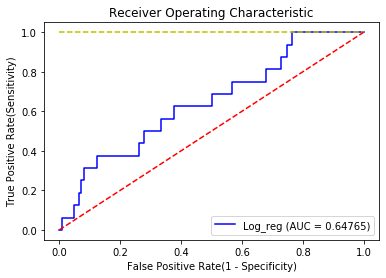

In [126]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()